# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3,333,7021,15601,15,550
1,112151,29627,18148,16745,4948,8550
2,3366,5403,12974,4400,5977,1744


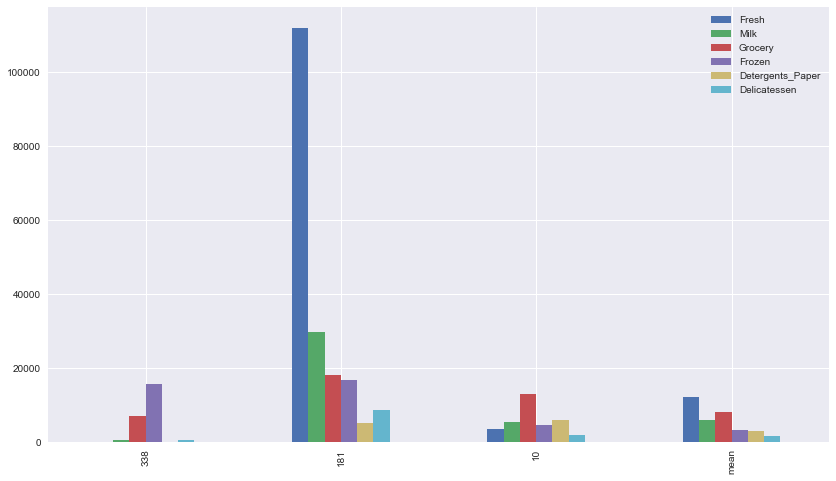

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset

# Import Seaborn Visualization Library
import seaborn as sns

indices = [338,181,10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)




# Get the mean - Could we use the median (outliers)?
mean_data = data.describe().loc['mean', :]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))



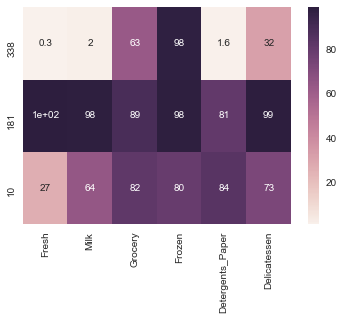

In [59]:
# Import Seaborn Visualization Library
import seaborn as sns

# Print Heatmap
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Given the visualization of the mean purchase cost and the heatmap we can say that:

1. Index 338: Delicatessen or Street Food Restaurant
   - Amount spent on Fresh is equal to the minimum spent.
   - Spending on each of Milk, Detergents and Paper is in the 1st quartile. Probably the establishment is not very big.
   - Needs excesive amounts of frozen food and less but still noticable amounts spent on groceries. Probably needs to produce quick food and serve basic beverages e.g. coffe or tea to customers.
   
2. Index 181: Dedicated Supermarket or Large market
    - Highest quartile for spending in all good categories with the lwest amount spent on groceries and detergents and papers. 
    - Highest spending on fresh goods of all customers in dataset. That means that the establishment serves customers high demeand on fresh food. 
    - Little spending on detergent and paper, which indicates it is unlikely to be a shopping mall type shop.
    - The establishment could potentially be a dedicated supermarket that aims customers with bio food habits.
3. Index 10: Small Supermarket or Offlicense Store
    - Fresh food is almost the 25% percentile. Indicating that the estamblishment does not focus on serving fresh products.
    - Most of the expenses are dedicated in groceries, frozen products and detergents and papers.This suggests it is probablya grocery shop of some size or a supermarket.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [72]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Loop through all columns
for col in list(data.columns):
    

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data =  data.drop([col], axis = 1)


    predicted_class = pd.DataFrame(data.loc[:, col])

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, predicted_class , test_size=0.25, random_state = 42)

    #     # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)


    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)

    print('R2 score for {} as dependent variable: {}'.format(col, score))

R2 score for Fresh as dependent variable: -0.385749710204
R2 score for Milk as dependent variable: 0.156275395017
R2 score for Grocery as dependent variable: 0.681884008544
R2 score for Frozen as dependent variable: -0.210135890125
R2 score for Detergents_Paper as dependent variable: 0.271666980627
R2 score for Delicatessen as dependent variable: -2.2547115372


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

All the predictors were used as predicted classes in order to determine the feature relevance

Given the R2 Score results:
   - Fresh as dependent variable: **-0.385749710204**
   - Milk as dependent variable: **0.156275395017**
   - Grocery as dependent variable: **0.681884008544**
   - Frozen as dependent variable: **-0.210135890125**
   - Detergents_Paper as dependent variable: **0.271666980627**
   - Delicatessen as dependent variable: **-2.2547115372**

Negative R2 scores in "Fresh", "Frozen" and "Delicatessen" as dependent variables indicate that these fetaures are necessary for identifying customers' spending habits since the rest of them cannot explain the variation in them.

At the same time, "Milk" and "Detergents_Paper" have very low R2 scores which also imply that these feature are also important predictors.

However, "Grocery" has a R2 score of 0.68. Despite the fact that, it's a low score it seems that is the highest and it can be explained by the reset of the feature predictors. Thus, it's most probably not necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

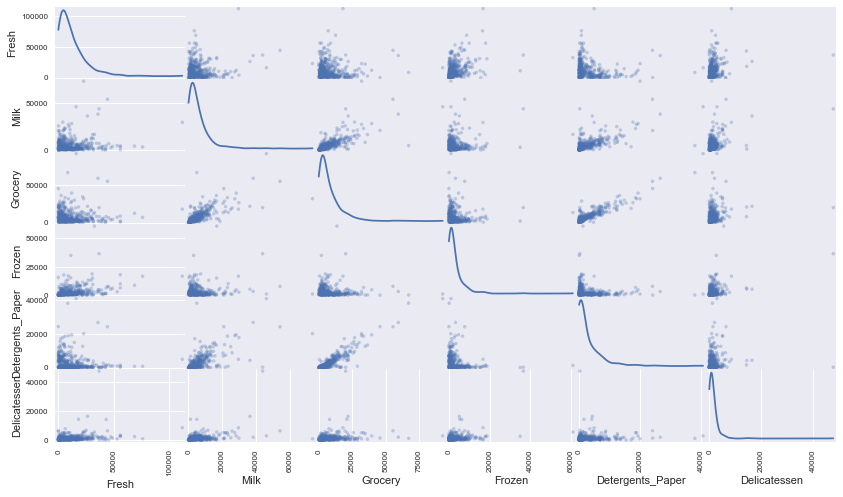

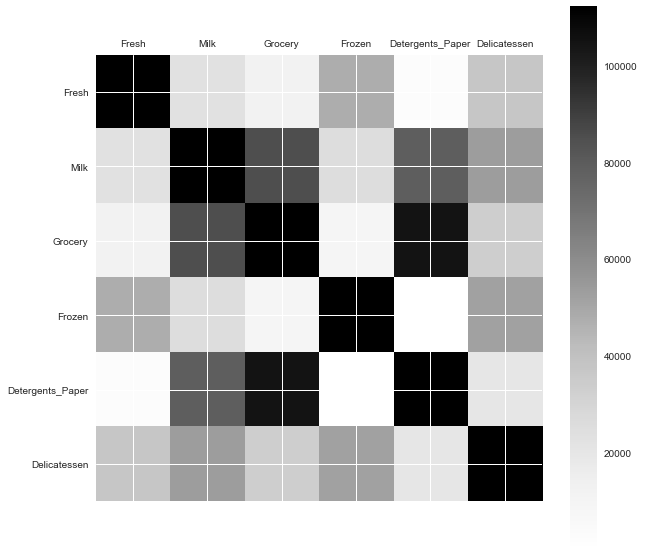

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Plot correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(data, interpolation='nearest')
ax.matshow(corr)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Scatter plot gives us a first overview of the underlying relationship between the features of the data. With correlation matrix to verify our initial thoughts.

The data are skewed to the right and thus not normaly distributed due to the presence of many outliers. This indicates that feature scaling is essential as many ML algorithms assume the data be normally distributed.


Ranking in order of correlation from strongest to weakest. The relationship between the following pairs of features seem to have  correlation as observed from the scatter plot 

- Grocery and Detergents_Paper.
- Grocery and Milk.
- Detergents_Paper and Milk (relatively weak).

Provided the above ranking of the features, we can securely conclude that our initial claim is accurate. Grocery may not be necessary for identifying customers' spending habits.

Grocery, Milk and Detergents_Paper have a high correlation that corresponds to a relatively high R2 score when we regress Grocery on all other features.



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

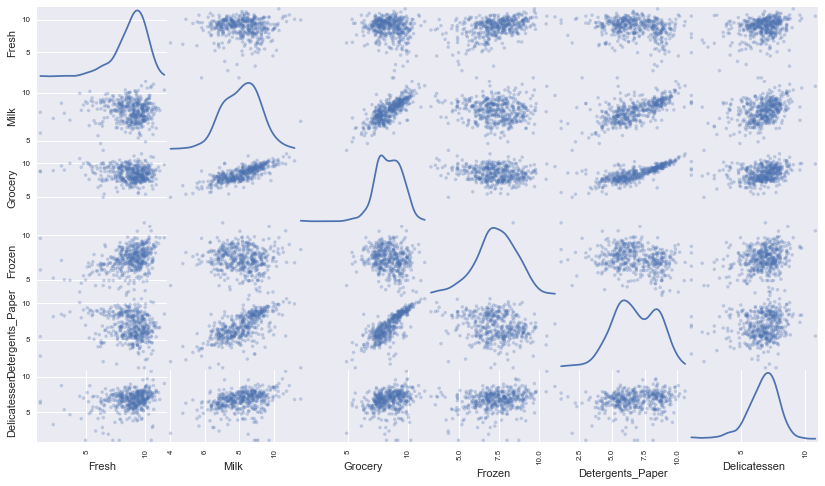

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

# Plot correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(data, interpolation='nearest')
ax.matshow(corr)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Plot correlation matrix
corr = log_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(log_data, interpolation='nearest')
ax.matshow(corr)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937


NameError: name 'plt' is not defined

**New Correlation**

From the second  matrix above we can observe that the correlation between the groceries and detergents and papers is weaker than before. The correlation between the rest of the features stayed almost the same. 

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

### Visual Outliers Detection - Boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x10f6beb8>,
 'caps': [<matplotlib.lines.Line2D at 0x111626d8>,
 'fliers': [<matplotlib.lines.Line2D at 0xf147198>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11162dd8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10f6bf98>,
  <matplotlib.lines.Line2D at 0xf05e2b0>]}

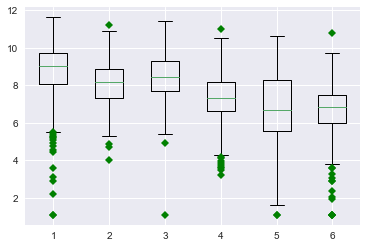

In [75]:
import matplotlib.pyplot as plt
d = log_data.iloc[:,:].values
plt.figure()
plt.boxplot(d,0, 'gD')

In [10]:
all_outliers = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 =  np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step =  (Q3 - Q1)*1.5 
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_observation_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers  = np.append(all_outliers, outlier_observation_points.index.values.astype('int64'))
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

all_outliers , indices = np.unique(all_outliers , return_inverse=True)
counts = np.bincount(indices)

# Duplicate Outliers
duplicate_outliers = all_outliers [counts>1]

print "All Outliers:"
print all_outliers

print "Duplicate Outliers:"
print duplicate_outliers


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


All Outliers:
[ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]
Duplicate Outliers:
[ 65  66  75 128 154]
New dataset with removed outliers has 440 samples with 6 features each.


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are some data points to be considered outliers in more than one features like [ 65  66  75 128 154]. 

Although the main approach towards outliers handling is to remove them, in my personal opinion I believe that in certain context the outliers are representative. Specifically, in our case we try to distinguish the type of different types of customers of a wholesale distributor. 

I think its resonable that a data observation can be considered as a outlier sinnce different establishments have different need in regards to the amount spend in products. For example, a supermarket is going to spend a lot more on groceries compared to a cafe, that may get caught as an outlier, however in my opinion this is the characteristic that distinguishes the two establishments.

I think its best to let PCA analysis to figure out which features maximize variance the best regarding the underlying structure of our data. 


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

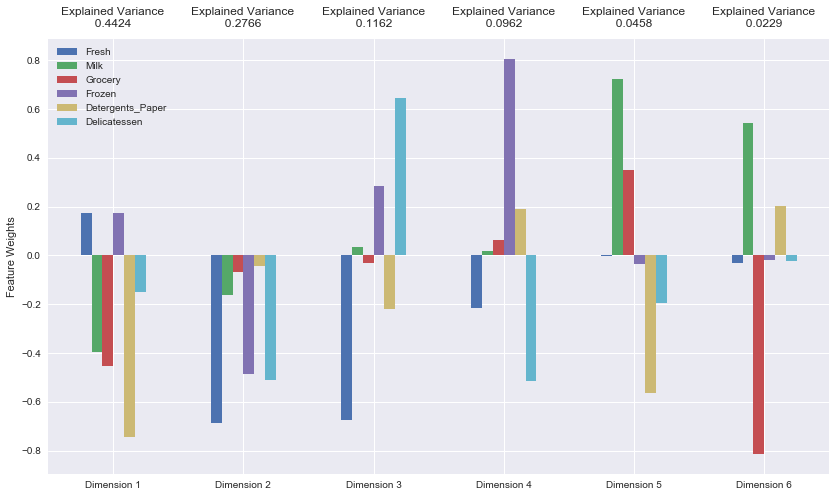

In [11]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [81]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4424,0.1737,-0.3945,-0.4544,0.1722,-0.7455,-0.1494
Dimension 2,0.2766,-0.6851,-0.1624,-0.0694,-0.4877,-0.0419,-0.5097
Dimension 3,0.1162,-0.6735,0.0331,-0.0322,0.2848,-0.2182,0.6446
Dimension 4,0.0962,-0.2143,0.0186,0.0645,0.8061,0.1901,-0.5135
Dimension 5,0.0458,-0.0008,0.7223,0.3480,-0.0362,-0.5637,-0.1954
Dimension 6,0.0229,-0.0293,0.5430,-0.8139,-0.0174,0.2024,-0.0228


pandas.core.frame.DataFrame

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64

**Answer:**

- PC1 and PC2 describe almost 71.9% of the explained variance and the first four principle components describe 93.14% of the explained variance.

- Dimension 1: A significant negative weight is placed on 'Detergents_Paper' and a noticable negative weight on 'Milk' and 'Grocery'.This dimension is best represented by customers spending on retail goods, possibly convenience stores or supermarket. 

- Dimension 2: All the weights are negative with a significant negative weight  placed on 'Fresh' and a noticable negative weight on 'Frozen' and 'Delicatessen'. This PCA probably represents customer spending on goods to cook in restaurant industry, e.g. small restaurant or street food establishment. 

- Dimension 3: A significant positive weight is placed on 'Delicatessen', a meaningful positive weight on 'Frozen' and a significant negative weight on 'Fresh'. This dimension best represents customers like  small convenience stores, deli's, etc.

- Dimension 4: A significant positive weight is placed on 'Frozen' and a noticable negative weight on 'Delicatessen'.This could probably represent bulk buyers of frozen goods, such as meat or sea food importers. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [82]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.8963,4.7798,6.3817,2.9243,0.7629,-2.2292
1,-2.1974,-4.9048,-0.0686,0.5623,0.5195,0.2369
2,-2.1162,-0.7488,0.8007,1.0355,-0.5710,-0.2135


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [84]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.8963,4.7798
1,-2.1974,-4.9048
2,-2.1162,-0.7488


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

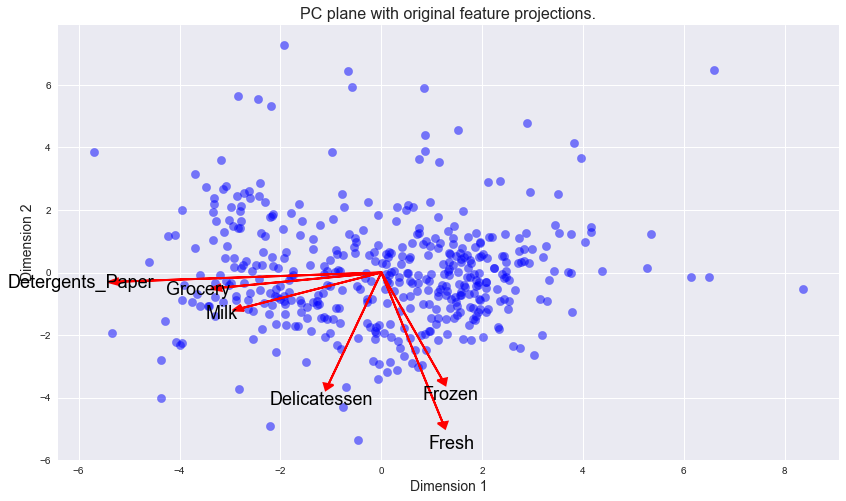

In [85]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**

Given the biplot visualization and the pcs results we observe that the data do not aggree with each other. The features detergents & paper, Grocery and Milk are negatively weighted and strongly correlated with PCA 1 (dimension 1) and Delicatessen, Frozen, Fresh are negatively correlated with PCA 1 (dimension 1)  

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

1. K-Means:
    Intuition: K-means define hard clusters, the samples are to be associated to homogeneous groups sharing same characteristics (Clusters). 
    
    - Advantages of K-Means:
        1. Fast Convergence
        2. Better for high dimensional data.    
        3. Interpretability.
        4. Optimal Centroid Initialization (KMeans++ kernel)
  

    - Disadvantages of K-Means:
        1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)
        2. Hard Assignment might lead to mis grouping.
        3. It may converge to a local optima depending on your initialization of clusters.
        4. It is susceptible to outliers.

2. Guassian Mixture:
    Intuition: This method for clustering would let you determine homoheneous groups, without associating each sample with a cluster. groups are defined by distributions with unknown parameters , for learning these parameters Expectation-Maximisation is to be used. With each sample there is a corresponding latent random variable each distributed according to a K-dimensional categorical distributions, where K is the number of groups. Mixture models can be thought as generalising k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

    Bottom line, instead of hard assgning data points to a cluster (KMeans), if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

    - Advantages:

        1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.
        2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular). Data observations are assigned probabilities of belonging to clusters.
        

    - Disadvantages:
        1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.
        2. It may converge to a local optima depending on the cluster initialization.
        3. Difficult interpretation.
        
Since there are a lot of outliers I will use the K_means clustering. This means that there will be some misclassifications where it is not clear if a customer belongs to one or another segment. However, establishments with higher spendings (outliers) in my opinion should belong to the same segment.
        
References

1. http://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
2. http://scikit-learn.org/stable/modules/mixture.html#gmm-classifier
3. http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

### Optimal Number of Clusters
Apart from silhoutte coeficient method there is another methods for identifying the optimal number of clusters. It's called the ***The Elbow Method*** which visualizes the inertia. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the ***inertia*** or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

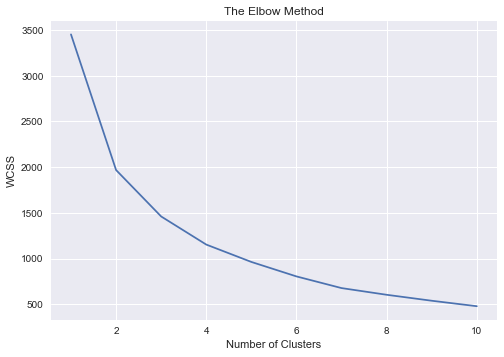

In [15]:
# Imports
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Inertia Calculation
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, n_jobs = -1, random_state = 0)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)
    
# Inertia Visualization  - The Elbow Method
plt.plot  (range(1, 11), wcss)
plt.title ('The Elbow Method')
plt.xlabel ('Number of Clusters')
plt.ylabel ('WCSS')
plt.show()

The visualization of inertia (elbow) suggests that 2 would be the optimal number of clusters.  

In [23]:
from sklearn.metrics import silhouette_score

# Silhoutte coeficient
list_of_k = [2,3,4,5,6,7,8,9,10,11]
for k in list_of_k:
    clusterer = KMeans(n_clusters=k,init = 'k-means++', n_jobs = -1, random_state=42).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    print("Silhouette Score with k = " + str(k) + ": " + str(silhouette_score(reduced_data, preds)))

Silhouette Score with k = 2: 0.419710620309
Silhouette Score with k = 3: 0.392377161563
Silhouette Score with k = 4: 0.330208290907
Silhouette Score with k = 5: 0.349817800307
Silhouette Score with k = 6: 0.358533292198
Silhouette Score with k = 7: 0.363544946733
Silhouette Score with k = 8: 0.354130162895
Silhouette Score with k = 9: 0.343885986412
Silhouette Score with k = 10: 0.354467949463
Silhouette Score with k = 11: 0.346603956912


In [25]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, init = 'k-means++', n_jobs = -1, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

- Silhouette Score with k = 2: 0.419166083203
- Silhouette Score with k = 3: 0.393473191482
- Silhouette Score with k = 4: 0.330321550765
- Silhouette Score with k = 5: 0.346912914989
- Silhouette Score with k = 6: 0.360569121321
- Silhouette Score with k = 7: 0.365684920671
- Silhouette Score with k = 8: 0.355626760574
- Silhouette Score with k = 9: 0.359250307797
- Silhouette Score with k = 10: 0.350808023987
- Silhouette Score with k = 11: 0.349161962525

For k = 2, the score is the highest.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

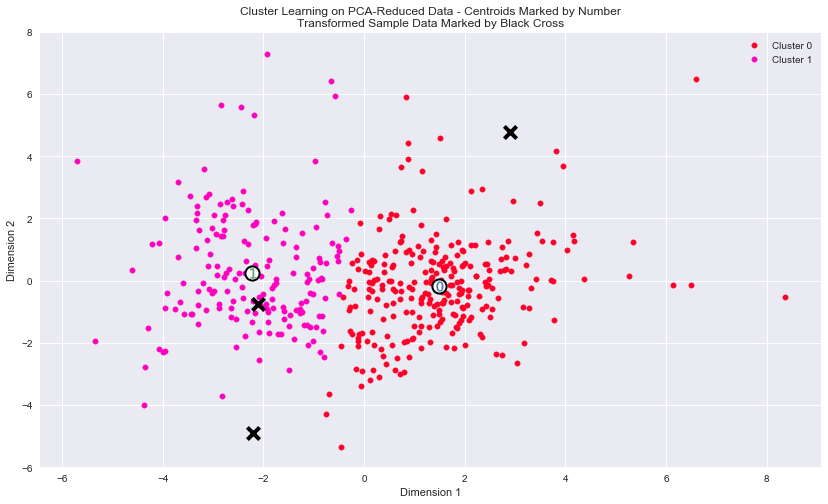

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8991.0,1915.0,2374.0,2080.0,292.0,683.0
Segment 1,3553.0,7774.0,12516.0,896.0,4601.0,965.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,487.0,-1712.0,-2381.5,554.0,-524.5,-282.5
Segment 1,-4951.0,4147.0,7760.5,-630.0,3784.5,-0.5


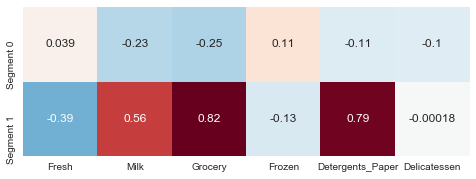

In [30]:
display(true_centers - data.median())


sns.heatmap((true_centers-data.median())/data.std(ddof=0),
            square=True, annot=True, cbar=False)

**Answer:**

Due to the existence of many outliers it is wise to use median metric from the data description, since mean is succeptible to outliers.


Segment 0: This most likely represents cafes/restaurants serving fresh food due to the strong weight upon the Fresh, Delicatessen and Frozen features category. 

Segment 1: The amount spent of Grocery, Milk and Delicatessen are predominant here. The Milk and Grocery values in this cluster exceed the overall median values according to Data Exploration section, which suggests the are bulk distributors or large resellers such as supermarkets.

In [37]:
display(samples)
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3,333,7021,15601,15,550
1,112151,29627,18148,16745,4948,8550
2,3366,5403,12974,4400,5977,1744


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8991.0,1915.0,2374.0,2080.0,292.0,683.0
Segment 1,3553.0,7774.0,12516.0,896.0,4601.0,965.0


### Observation

Given the cluster centers a preliminary prediction regarding the group each sample point belongs to is the following:

- Sample 0 - Segment 0: Large consumption on Grocery, Forzen and relative consumption in Delicatessen. It's probably a small super market or a delicatessen. 
 
- Sample 1 - Segment 1: Huge spending on every product category, it's probably a bulk distributer(big supermarket)

- Sample 2- Segment 1: Pretty mush like sample 1, lot's of spending on pretty much every product category. However, compare to sample 1, delicatessen, frozen, fresh and milk have lower values which probably represents a convenience store or a medium super market  

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [36]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
display(samples)
display(true_centers)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3,333,7021,15601,15,550
1,112151,29627,18148,16745,4948,8550
2,3366,5403,12974,4400,5977,1744


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8991.0,1915.0,2374.0,2080.0,292.0,683.0
Segment 1,3553.0,7774.0,12516.0,896.0,4601.0,965.0


**Answer:**

Index 338: Delicatessen or Street Food Restaurant

High Spent:
   - Needs excesive amounts of frozen food and less but still noticable amounts spent on groceries.
Low Spent:
   - Amount spent on Fresh is equal to the minimum spent.
   - Spending on each of Milk, Detergents and Paper is in the 1st quartile. Probably the establishment is not very big.


Index 181: Bulk distributer (Large Super Market)

High Spent:
   - Sending on fresh goods
Low Spent:
   - Groceries and detergents and papers.
   - spending on detergent and paper


Index 10: Small Supermarket or Offlicense Store

High Spent:
 -  Groceries, frozen products and detergents and papers
Low Spent:
 - Fresh Porducts
 
 
 Cluster segment prediction aggrees with the initial intuition regarding the sample points.For Sample '0' the values for frozen is the highest and the value for fresh is significantly low. Results from segment 0 seem to be consistent with the specific sample.
 
For Sample '1' and '2' the values for 'Grocery', 'Milk', and 'Detergents_Paper' are above average. That seems to agrees with the segment 1  which makes the predicted cluster for each of the examined sample points seem to be consistent.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

It is important to have a represantative and possibly random sample from every group of customers to test changes on. That's why the experiment groups should include customers observations of both segments.

Such a change in delivery service would not affect all customers equally. That depends on their spent habits, some customers might order products every week or every few weeks. Other customers dur to their diet habits may give orders on a daily basis and are dependent on having fresh products. These are the customers who would be affected the most in a change of delivery service. 


- Segment 0
    Intuitively, the impact on Segment 0's customers should be minimal, due to the fact that their products are mainly non-perishable products like detergents_Paper or grocries. On the other hand however, establishment belonging to this segment like restaurants/caffes use products like milk or serve fresh food which are perishable. Even though, still these products may last more days with current technology advances in preservation, serving fresh food is going to be harder.

- Segment 1
    One would assume that a change in the delivery schedule would have a major impact Segment 1's customers. Extreme spending on   highly perishable  products like Fresh (fruits, vegetables, seafood and meat) would cause problems regarding their storage and product quality. At the same time, establishments that spent a lot on all product categories products like, bulk retailers, would have to buy more stock which means that will need more space.   


To that end we need a formal experiment (A/B Test) that will provide us with statistically significant results regarding the magnitude of the impact a change in delivery schedule has on the two groups.The null-hypothesis to be rejected will be that a potential change in the delivery schedule would have no significant impact in both groups.

We would choose completely in random a sample of two sample groups from each cluster. For example group 0-1, 0-2 would be the group experiencing the change and the control group respectively for cluster 0.Group 1-1, 1-2 would be the group experiencing the change and the control group respectively for cluster 1.

So given that four groups we would follow the above procedure:

Keeping unchanged the delivery schedules for groups 0-1 and 1-1, we will change the schedules for group 0-2 and 1-2. Given that, we will conduct customer satisfaction survey for all groups and cross-reference their satisfaction level in respect to their spendings (2 metrics involed).


Clients with low satisfaction levels would experience a negative impact and a decreased or probably similar spending. On the other hand, clients experiencing a positive impact would have a high levels of satisfaction and an increased or at least similar spending levels. Finally, we could investigate anomalies like clients display contradictory signals like expressing a low satisfaction level and increasing spending, and vice versa.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I would suggest using SVM or LG in order to classify the new clients based on their features. Given the distribution visualization above I would strongly suggest SVM with a non-linear kernel (e.g. rbf). A binary target variable would be appropriate, like the cluster assignment given from kmeans.

 - Cluster 0 : 0
 - Cluster 1 : 1

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

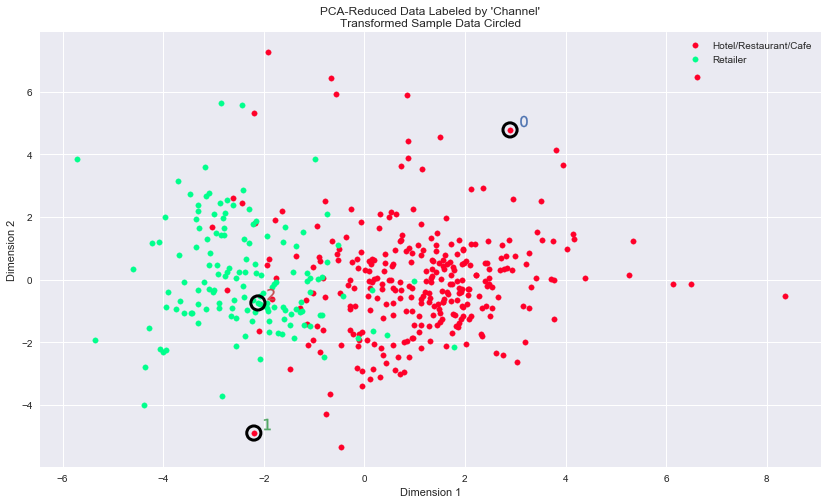

In [34]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The cluster algorithm did not do very well with the number of clusters not being so consistent with the underlying distribution. There are obviously two main clusters however, many observations especially in the intersection between the two clusters are misclassified. Choosing soft clustering (EM) would probably be a better choice.

There are customer segments that would be purely classified as  Hotels,Retailer,Restaurants,Cafes on the extreme left and right accordingly.

This classification is almost consistent with our suggestion that customers in cluster 0 are typically restaurants and cafes and cluster 1 customers are typically medium or large markets.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.